In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/manugarri/curso_data_science/master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Visualizaci%C3%B3n%20de%20datos%20en%20Python/boston_dataset.csv")
df.head(3)

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [0]:
import matplotlib.pyplot as plt

In [3]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

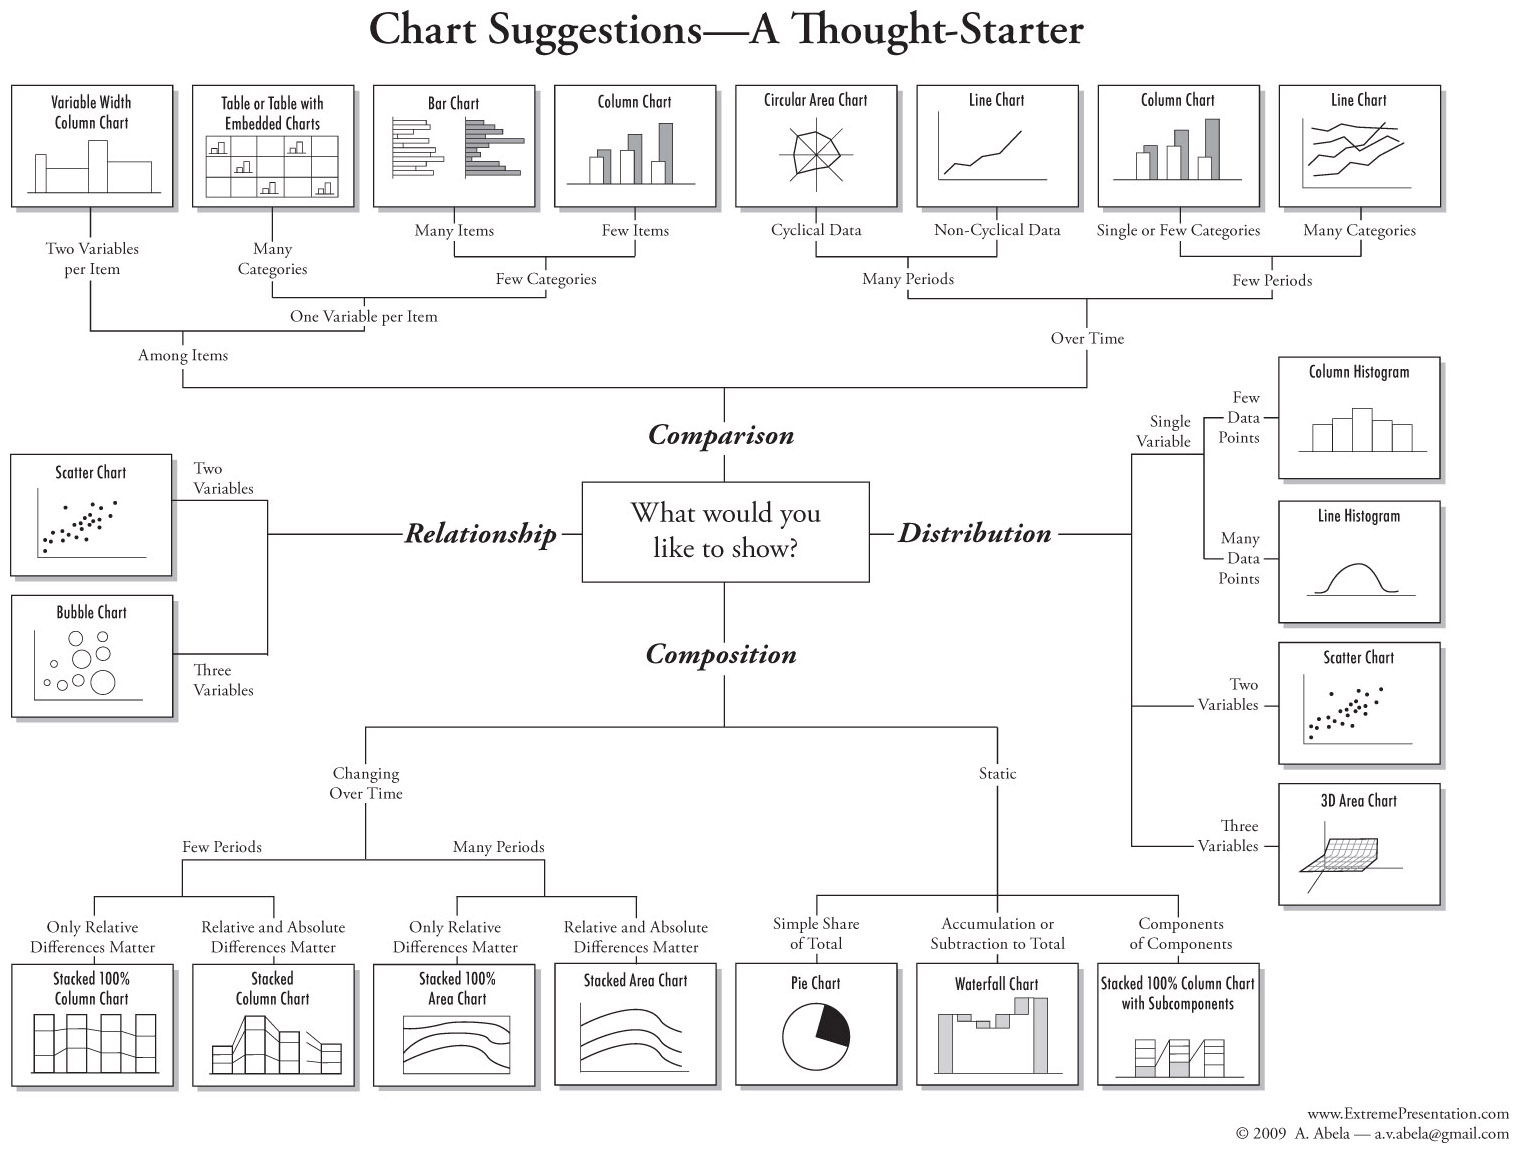

In [5]:
from IPython.display import Image

Image("http://www.perceptualedge.com/blog/wp-content/uploads/2015/07/Abelas-Chart-Selection-Diagram.jpg")

http://labs.juiceanalytics.com/chartchooser/index.html

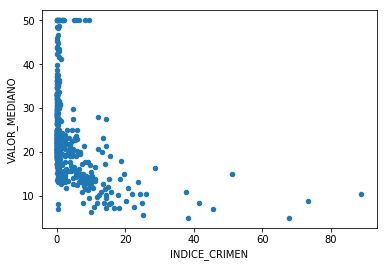

In [6]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")


In [0]:
plt.show()

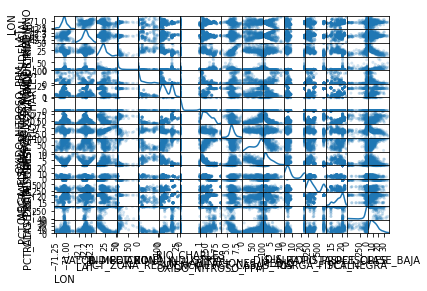

In [8]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, alpha=0.2, diagonal="kde")

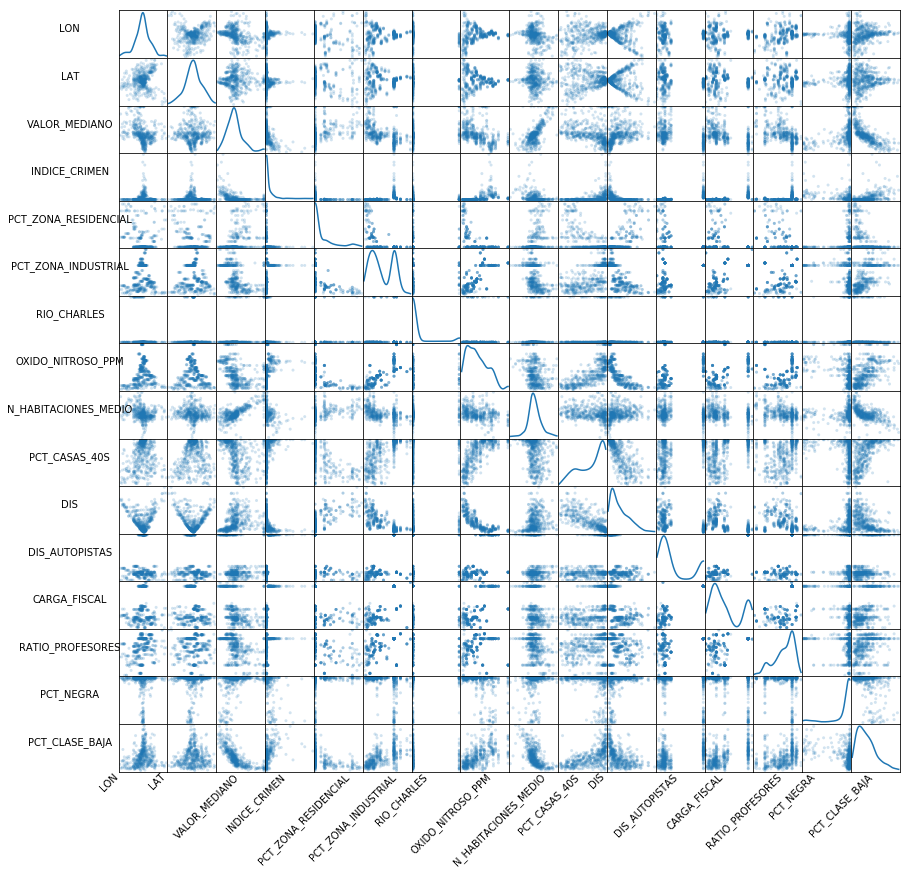

In [9]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

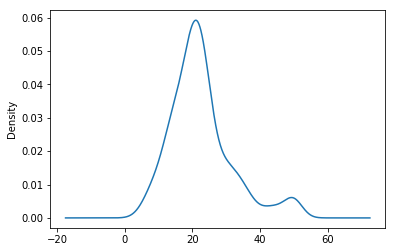

In [10]:
df.VALOR_MEDIANO.plot.kde()

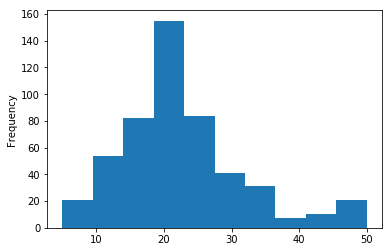

In [11]:
df.VALOR_MEDIANO.plot.hist()

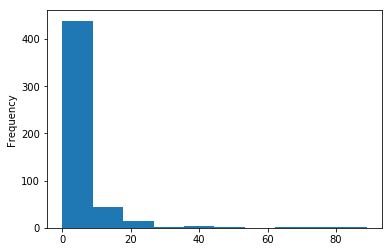

In [12]:
df.INDICE_CRIMEN.plot.hist()
#es muy grande el primer rano, así que se modifican con bins=20

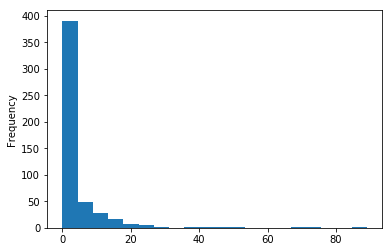

In [13]:
df.INDICE_CRIMEN.plot.hist(bins=20)

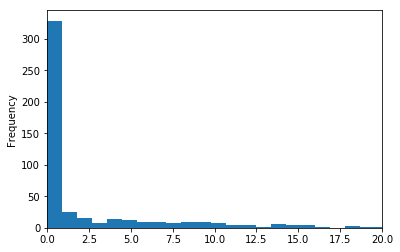

In [14]:
df.INDICE_CRIMEN.plot.hist(xlim=(0,20), bins=100)

In [15]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

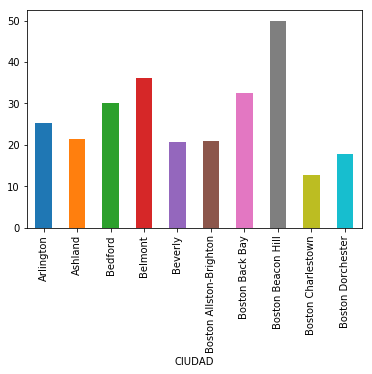

In [16]:
valor_por_ciudad.head(10).plot.bar()
#Se le puede agregar una h a bar para hacerlas horizontales

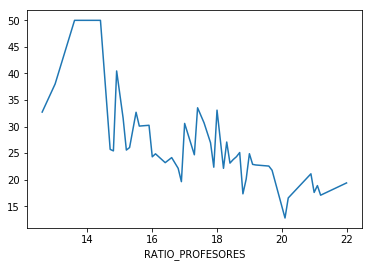

In [17]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line()

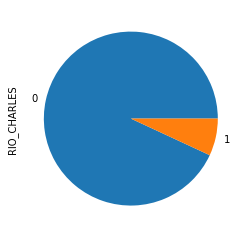

In [18]:
df.RIO_CHARLES.value_counts().plot.pie()

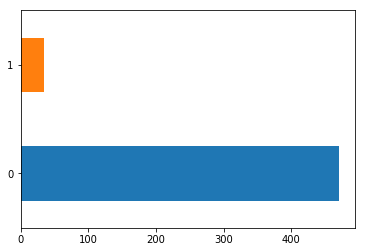

In [19]:
df.RIO_CHARLES.value_counts().plot.barh()

Text(0, 0.5, 'Valor mediano de las viviendas ($10)')

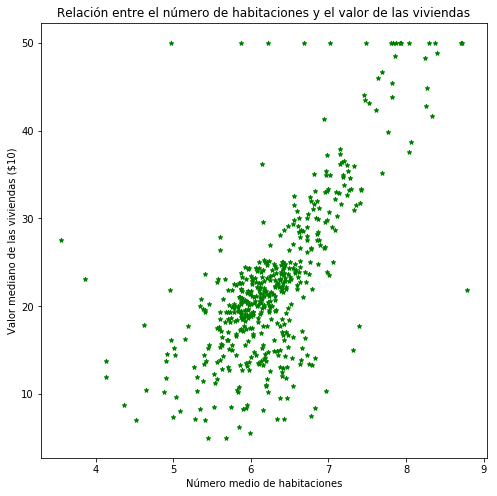

In [20]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="green", figsize=(8,8))
plt.title("Relación entre el número de habitaciones y el valor de las viviendas")
plt.xlabel("Número medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($10)")

In [0]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)

Text(0, 0.5, 'Valor mediano de las viviendas ($10)')

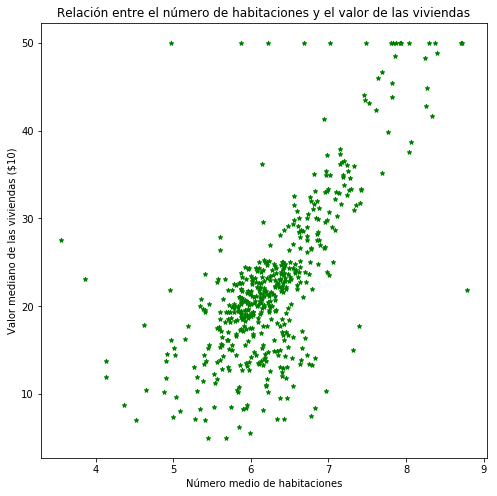

In [22]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="green")
plt.title("Relación entre el número de habitaciones y el valor de las viviendas")
plt.xlabel("Número medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($10)")

In [23]:
plt.style.available
#Muestra todos los estilos posibles

['bmh',
 'fivethirtyeight',
 'seaborn-notebook',
 '_classic_test',
 'ggplot',
 'seaborn-white',
 'fast',
 'seaborn-paper',
 'seaborn-talk',
 'grayscale',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-pastel',
 'classic',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-deep',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn',
 'seaborn-dark-palette']

In [0]:
#Se aplica como estilo global
plt.style.use("fivethirtyeight")

Text(0, 0.5, 'Valor mediano de las viviendas ($10)')

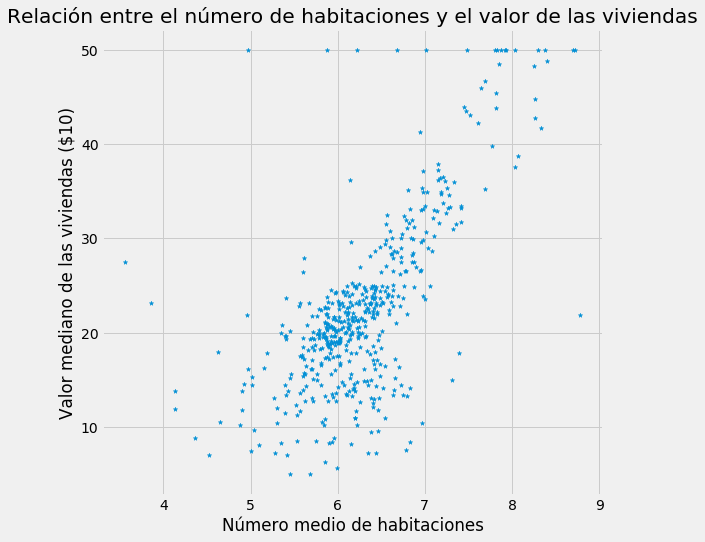

In [25]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*")
plt.title("Relación entre el número de habitaciones y el valor de las viviendas")
plt.xlabel("Número medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($10)")

In [0]:
#Para Jupyter
#!conda install -c conda-forge ipywidgets

In [0]:
from ipywidgets import interact

In [28]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

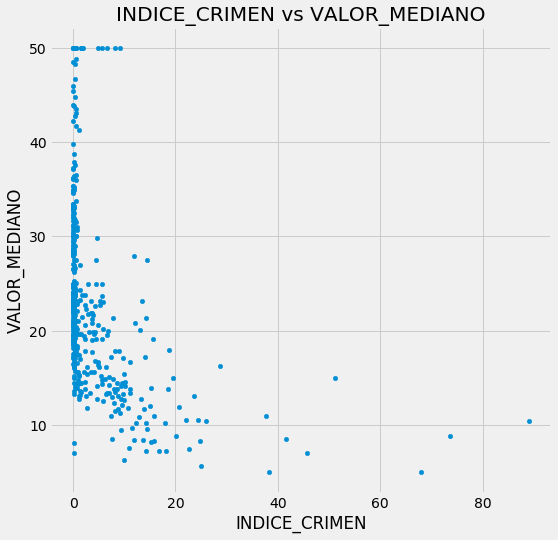

In [29]:
grafico_variable("INDICE_CRIMEN")

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
import cartopy.crs as ccrs

from cartopy.io import img_tiles

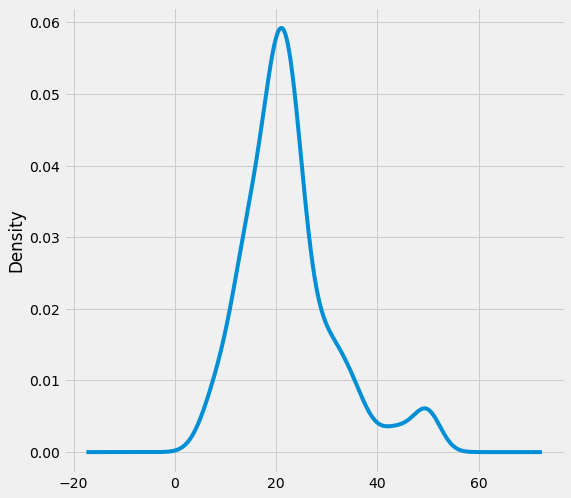

In [32]:
df.VALOR_MEDIANO.plot.kde()
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)

In [33]:
imagery = img_tiles.GoogleTiles()
ax = plt.axes(projection=imagery.crs)
limites_mapa = (-71.38 ,-70.77,42.03 , 42.47)
#Se consiguen las coordenadas en https://boundingbox.klokantech.com/
ax.set_extent(limites_mapa)
ax.add_image(imagery, 10)
df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]
df_tercer_qt = df[df.VALOR_MEDIANO>cuarto_quintil]
plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="red", linewidth=0, alpha=0.5)
plt.plot(df_tercer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="green", linewidth=0, alpha=0.5)
plt.show()

ValueError: ignored

<Figure size 576x576 with 1 Axes>

In [0]:
import seaborn as sns

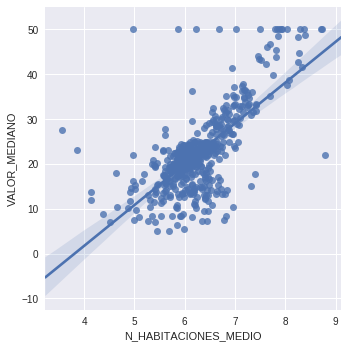

In [35]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

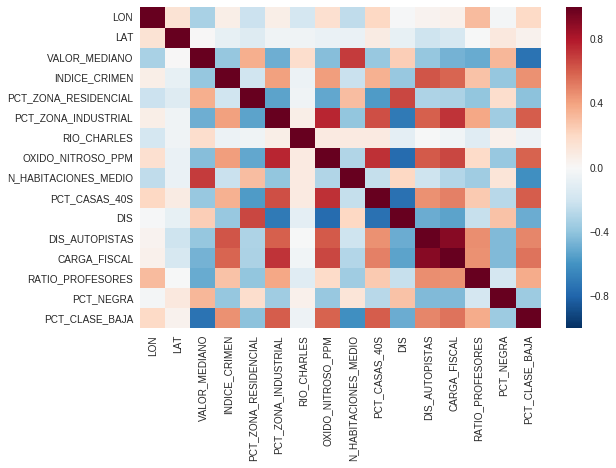

In [36]:
sns.heatmap(df.corr())

In [37]:
import bokeh.plotting as bk
bk.output_notebook()

Loading BokehJS ...

In [0]:
df.INDICE_CRIMEN

In [0]:
df["CRIMEN_QUINTIL"]=pd.qcut(df.INDICE_CRIMEN, 5)

In [40]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]]
              closed='right',
              dtype='interval[float64]')

In [41]:
from bokeh.palettes import brewer
colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c']

In [44]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs valor vivienda vs crimen"
)
for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
  df_q = df[df.CRIMEN_QUINTIL==quintil]
  p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
           legend="({}-{})".format(quintil.left, quintil.right))
  
  bk.show(p)